In [285]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Data**

In [286]:
df = pd.DataFrame({     'x': [5, 10, 25, 30, 35 ],
                        'y': [0, 0, 0, 0, 0]
                    })
df

,x,y
0,5,0
1,10,0
2,25,0
3,30,0
4,35,0


**Create an array from dataframe**

In [287]:
# slice the df
df_arr = df[['x', 'y']]

# Convert DataFrame to numpy array
arr = df_arr.values
arr

array([[ 5,  0],
       [10,  0],
       [25,  0],
       [30,  0],
       [35,  0]], dtype=int64)

**Define number of clusters**

In [288]:
k=2

In [289]:
# label the clusters
unique_values = [0, 1]
unique_values

[0, 1]

**Select/define centroids**

In [290]:
""" # random centroids
centroids = np.random.randint(1000, size=(3,2))
centroids """


""" # select rows
selected_centroids = [3, 6]

# slice the array
centroids = arr[selected_centroids]
centroids """



centroids = np.array([[15,0],
                      [20,0]
                      ])


In [291]:
centroids[0,0]

15

**Display data points and centroids**

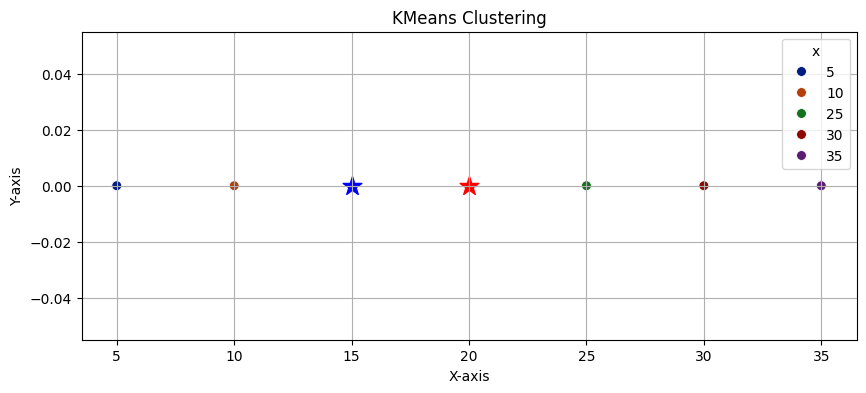

In [292]:
# Creating the figure and axes for a single subplot
fig, ax = plt.subplots(figsize=(10, 4))

# Creating the scatterplot
chart = sns.scatterplot(data=df, x='x', y='y', 
                        hue='x', palette='dark', s=50)

# Adding centroids to the plot
ax.scatter(centroids[0, 0], centroids[0, 1], marker='*', s=200, c="blue")
ax.scatter(centroids[1, 0], centroids[1, 1], marker='*', s=200, c="red")


# Adding title and axis names
ax.set(title='KMeans Clustering', xlabel='X-axis', ylabel='Y-axis')

# Adding grid
ax.grid(True)

plt.show()

**Calculate distance between centroids and the points**

![chart](chart.png)

![equation](dist.png)

In [293]:
""" 
1. calculate the distances for a centroid
2. append them into a list
3. concatenate all columns=number of centroids, into an array
"""

def calculate_distances(X, centroids) -> np.array:

    final_list=[]

    for i in range(centroids.shape[0]):
        distances = np.sqrt((X[:, 0] - centroids[i, 0]) ** 2 + 
                            (X[:, 1] - centroids[i, 1]) ** 2)
        
        distances = distances.reshape(-1, 1)

        final_list.append(distances)

    final = np.concatenate(final_list, axis=1)

    return final

In [294]:
# matrix of distances for 2 centroids
arr_new = calculate_distances(arr, centroids)
arr_new

array([[10., 15.],
       [ 5., 10.],
       [10.,  5.],
       [15., 10.],
       [20., 15.]])

In [295]:
arr_new.shape

(5, 2)

**Assign points to the clusters = find the min distance in a row**

In [296]:
''' 
find the min value in a array row and return the number of column in which was the value found
'''

cluster_num = np.argmin(arr_new,axis=1).reshape(-1, 1)

cluster_num

array([[0],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

**Calculate the new centroids**

In [297]:
# Concatenate original array with cluster array
merged_array = np.concatenate((arr, cluster_num), axis=1)
merged_array

array([[ 5,  0,  0],
       [10,  0,  0],
       [25,  0,  1],
       [30,  0,  1],
       [35,  0,  1]], dtype=int64)

In [298]:
# filter array - due to the plotting reasons


arr_1 = merged_array[merged_array[:,-1]==0].copy()
arr_1 = arr_1[:,:2]




arr_2 = merged_array[merged_array[:,-1]==1].copy()
arr_2 = arr_2[:,:2]

In [299]:
def new_centroids(unique_values, merged_array):

        # Filter the array
        new_list=[]

        for i in unique_values:
                
                filtered_array = merged_array[merged_array[:,-1]==i].copy()

                #print(filtered_array)

                filtered_array=np.mean(filtered_array, axis=0)

                new_list.append(filtered_array)
                new_centroids_arr = np.concatenate([new_list], axis=0)
                
        return new_centroids_arr

In [300]:
new_centroids_arr = new_centroids(unique_values, merged_array)

# Slice off the last column
new_centroids_arr = new_centroids_arr[:, :2]
new_centroids_arr

array([[ 7.5,  0. ],
       [30. ,  0. ]])

**Plot clustered datapoints and centroids**

In [313]:
def kmeans_charts(arr_1: np.array, arr_2: np.array, centroids: np.array):

    # Creating the figure and axes for a single subplot
    fig, ax = plt.subplots(figsize=(10, 4))

    # Creating scatterplot for the first dataset
    sns.scatterplot(x=arr_1[:,0], y=arr_1[:,1], s=70, marker='s', c="green")


    # Creating scatterplot for the second dataset
    sns.scatterplot(x=arr_2[:,0], y=arr_2[:,1], s=70, marker='s', c="brown")


    # Adding centroids to the plot
    ax.scatter(centroids[0, 0], centroids[0, 1], marker='*', s=200, c="blue")
    ax.scatter(centroids[1, 0], centroids[1, 1], marker='*', s=200, c="red")

    # Adding title and axis names
    ax.set(title='KMeans Clustering', xlabel='X-axis', ylabel='Y-axis')

    # Adding grid
    ax.grid(True)

    plt.show()

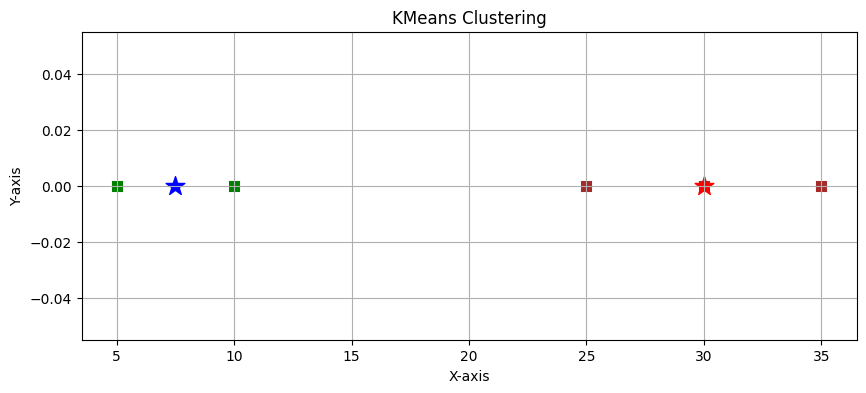

In [314]:
kmeans_charts(arr_1, arr_2, new_centroids_arr)

# Part 2 - Repeat interations 

In [303]:
n_iterations = 3

In [304]:
for i in range(n_iterations):


    # Calculate distances
    arr_new = calculate_distances(arr, new_centroids_arr)

    # Choose min value in a row and get a number of column=centroid where the min value was
    cluster_num = np.argmin(arr_new, axis=1).reshape(-1, 1)


    # Merge min value with original array=points
    merged_array = np.concatenate((arr, cluster_num), axis=1)
    

    # Calculate new centroids
    new_centroids_arr = new_centroids(unique_values, merged_array)
    

    # Slice off the last column
    new_centroids_arr = new_centroids_arr[:, :2]

    print(new_centroids_arr)


    # Add chart
    #TODO add chart

    #TODO calculate difference between clusters - add to the df and calculate diffrence between last 2

[[ 7.5  0. ]
 [30.   0. ]]
[[ 7.5  0. ]
 [30.   0. ]]
[[ 7.5  0. ]
 [30.   0. ]]
